In [ ]:
!pip install gdown #installing gdown module


In [ ]:
# downloading file from ggogle drive
import gdown
file_id = '1-f3LZt2VkD1q6UW7V14Jk-76THfcrJzn'
destination = 'dataset.zip'
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

# Unzipping thr file
import zipfile

with zipfile.ZipFile(destination, 'r') as zip_ref:
    zip_ref.extractall('c')


Downloading...
From (original): https://drive.google.com/uc?id=1-f3LZt2VkD1q6UW7V14Jk-76THfcrJzn
From (redirected): https://drive.google.com/uc?id=1-f3LZt2VkD1q6UW7V14Jk-76THfcrJzn&confirm=t&uuid=6453daeb-5262-48ee-8528-48f1f135ff9f
To: /content/dataset.zip
100%|██████████| 905M/905M [00:24<00:00, 36.5MB/s]


In [ ]:
# importing all the libraries
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
df=pd.read_csv('/content/c/CaptchaDataset/dataset1/mapping.csv')

In [ ]:
df

,file_name,captcha
0,1.png,p5g5m
1,2.png,e72cd
2,3.png,pgmn2
3,4.png,6cm6m
4,5.png,68wfd
...,...,...
1065,1066.png,ggd7m
1066,1067.png,de45x
1067,1068.png,b28g8
1068,1069.png,6p7gx


In [ ]:
# after observing data in the excel i found out that some of the captchas were given as numbers not the correct label
# hence removing them
def check_for_all_int(string):
    try:
        int(string)
        return True
    except ValueError:
        return False
int_valued_captcha=[]
for cap in df['captcha']:
  if check_for_all_int(cap):
    int_valued_captcha.append(cap)
for cap in int_valued_captcha:
  df=df.drop(df[df['captcha']==cap].index)

In [ ]:
# checking how many classes or characters are possible for the given datset captchas
elements=set()
for cap in df['captcha']:
    for char in cap:
        elements.add(char)


In [ ]:
classes = len(elements)

In [ ]:
elements = list(elements)

In [ ]:
elements.sort()

In [ ]:
# one hot encoding each of our 19 different classes
el = np.array(range(classes))
from tensorflow.keras.utils import to_categorical

elements_one_hot = to_categorical(el, num_classes=19)

In [ ]:
dic = {elements[i]:e for i,e in enumerate(elements_one_hot)} # dictionary consisting of each character and their assigned one hot encoded vector

In [ ]:
d={'c1':[],'c2':[],'c3':[],'c4':[],'c5':[] }

In [ ]:
# breaking the captcha into characters
for c in df['captcha']:
    d['c1'].append(c[0])
    d['c2'].append(c[1])
    d['c3'].append(c[2])
    d['c4'].append(c[3])
    d['c5'].append(c[4])

In [ ]:
df.index=range(1062)

In [ ]:
df1=pd.DataFrame(d,index=df.index) # this contains charaterwise captcha in 5 columns

In [ ]:
df=pd.concat( [df,df1],axis=1)

In [ ]:
df=df.drop('captcha',axis=1)

In [ ]:
# now replacing each character by their one hot encoded vector
for i in range(5):
    df['c'+str(i+1)]=df['c'+str(i+1)].map(dic)

In [ ]:
df

,file_name,c1,c2,c3,c4,c5
0,1.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4.png,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5.png,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
1057,1066.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1058,1067.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1059,1068.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1060,1069.png,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
# dividing into train and validation datasets
train_df=df[:1000]
valid_df=df[1000:]

In [ ]:
# this takes in image data and applies preprocessing and data augmentation to it
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range = 15)
valid_datagen = ImageDataGenerator(rescale=1./255,rotation_range = 15)

In [ ]:
# loading data using data loader. this divides the data into batches with their labels taken from the data frame itself
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    directory='/content/c/CaptchaDataset/dataset1/images',
                                                    x_col='file_name',
                                                    y_col=['c1','c2','c3','c4','c5'],
                                                    target_size=(200,200),
                                                    class_mode='multi_output')
valid_generator = valid_datagen.flow_from_dataframe(test_df,
                                                    directory='/content/c/CaptchaDataset/dataset1/images',
                                                    x_col='file_name',
                                                    y_col=['c1','c2','c3','c4','c5'],
                                                    target_size=(200,200),
                                                  class_mode='multi_output')

Found 1062 validated image filenames.
Found 112 validated image filenames.


In [ ]:
# importing vgg16 model and other nessecities
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model

In [ ]:
vggnet = VGG16(include_top=False, input_shape=(200, 200, 3))  # loading vgg16 without its dense layers

In [ ]:
vggnet.trainable=True  # this will not load the weights of conv layers directly instead will get the weights by training on my data

In [ ]:
# describing model architecture
# i have created a multi output architecture for my model as i didnt crop the image and fed it into the network one by one
# instead i am giving the whole image itself and after flatten layer i am dividinbg into 5 different mlp to get 5 outputs
o = vggnet.layers[-1].output # taking the output layer of vgg16

flatten=Flatten()(o) # flattening the output of last conv layer

cd1=Dense(512,activation='relu')(flatten)
cd2=Dense(512,activation='relu')(flatten)
cd3=Dense(512,activation='relu')(flatten)
cd4=Dense(512,activation='relu')(flatten)
cd5=Dense(512,activation='relu')(flatten)

ccd1=Dense(128,activation='relu')(cd1)
ccd2=Dense(128,activation='relu')(cd2)
ccd3=Dense(128,activation='relu')(cd3)
ccd4=Dense(128,activation='relu')(cd4)
ccd5=Dense(128,activation='relu')(cd5)

ccdd1=Dense(64,activation='relu')(ccd1)
ccdd2=Dense(64,activation='relu')(ccd2)
ccdd3=Dense(64,activation='relu')(ccd3)
ccdd4=Dense(64,activation='relu')(ccd4)
ccdd5=Dense(64,activation='relu')(ccd5)

cccdd1=Dense(64,activation='relu')(ccdd1)
cccdd2=Dense(64,activation='relu')(ccdd2)
cccdd3=Dense(64,activation='relu')(ccdd3)
cccdd4=Dense(64,activation='relu')(ccdd4)
cccdd5=Dense(64,activation='relu')(ccdd5)


# softmax layer for number of classes

output1=Dense(classes,activation='softmax',name='c1')(cccdd1)
output2=Dense(classes,activation='softmax',name='c2')(cccdd2)
output3=Dense(classes,activation='softmax',name='c3')(cccdd3)
output4=Dense(classes,activation='softmax',name='c4')(cccdd4)
output5=Dense(classes,activation='softmax',name='c5')(cccdd5)

# ignore the error as i accidently ran it while writing comments

NameError: name 'vggnet' is not defined

In [ ]:
model=Model(inputs=vggnet.input,outputs=[output1,output2,output3,output4,output5])  # creating the model object

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 200, 200, 64)         1792      ['input_8[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 200, 200, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)         0         ['block1_conv2[0][0]']        
                                                                                            

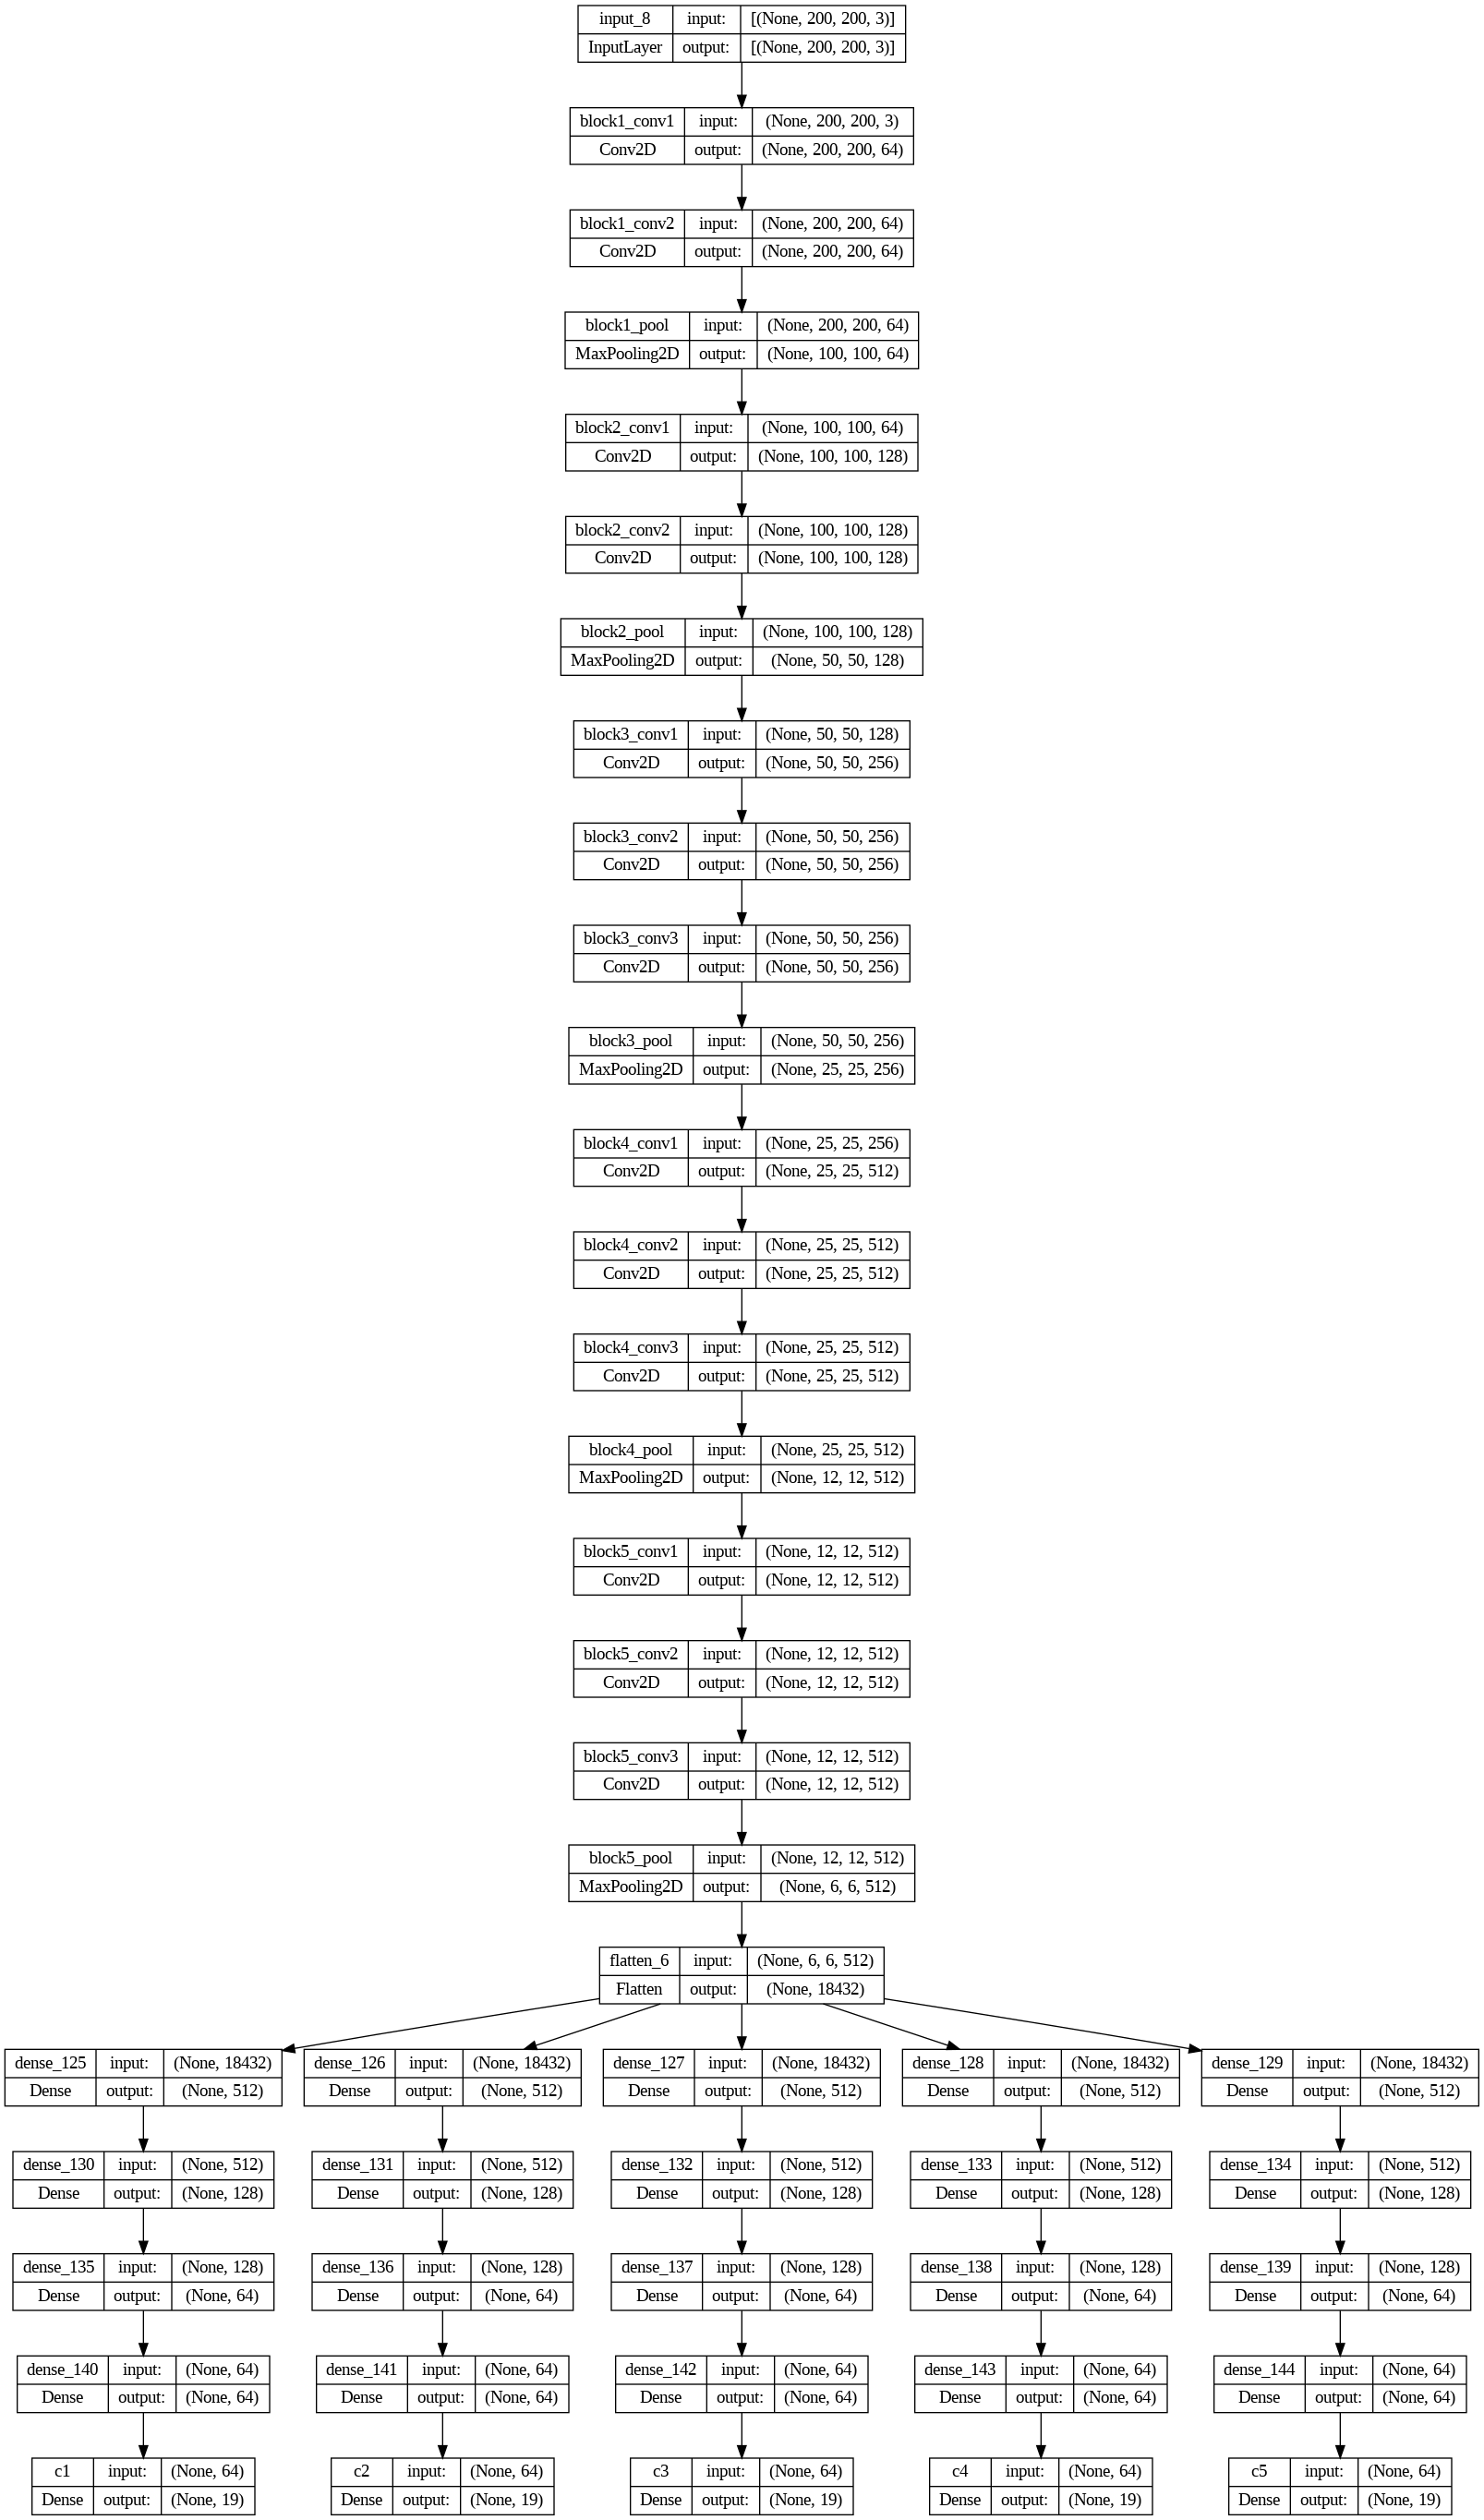

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
import tensorflow as tf
# compiling my model , learning rate is low as i am training vgg16 and calculating categorical crossentropy loss as my task is to classify in 19 different classes
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),loss={'c1':'categorical_crossentropy','c2':'categorical_crossentropy','c3':'categorical_crossentropy','c4':'categorical_crossentropy','c5':'categorical_crossentropy'},metrics={'c1':'accuracy','c5':'accuracy','c4':'accuracy','c3':'accuracy','c2':'accuracy'})

In [ ]:
history=model.fit(train_generator,validation_data=test_generator,epochs=18)  # training the model

Epoch 1/18
34/34 [==============================] - 29s 517ms/step - loss: 14.7614 - c1_loss: 2.9550 - c2_loss: 2.9684 - c3_loss: 2.9633 - c4_loss: 2.9440 - c5_loss: 2.9308 - c1_accuracy: 0.0556 - c2_accuracy: 0.0386 - c3_accuracy: 0.0650 - c4_accuracy: 0.0913 - c5_accuracy: 0.0734 - val_loss: 14.6357 - val_c1_loss: 2.9158 - val_c2_loss: 2.9325 - val_c3_loss: 2.9769 - val_c4_loss: 2.9383 - val_c5_loss: 2.8723 - val_c1_accuracy: 0.0804 - val_c2_accuracy: 0.0625 - val_c3_accuracy: 0.0357 - val_c4_accuracy: 0.0982 - val_c5_accuracy: 0.1875
Epoch 2/18
34/34 [==============================] - 19s 562ms/step - loss: 14.5021 - c1_loss: 2.9092 - c2_loss: 2.9168 - c3_loss: 2.9121 - c4_loss: 2.9082 - c5_loss: 2.8560 - c1_accuracy: 0.0960 - c2_accuracy: 0.0593 - c3_accuracy: 0.1111 - c4_accuracy: 0.1008 - c5_accuracy: 0.1488 - val_loss: 14.3459 - val_c1_loss: 2.8665 - val_c2_loss: 2.8843 - val_c3_loss: 2.9378 - val_c4_loss: 2.8958 - val_c5_loss: 2.7616 - val_c1_accuracy: 0.1696 - val_c2_accuracy:

In [ ]:
# a funtion to predict my image's captcha
def predicting(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (200, 200))  # Resizing to match input size
    img = img / 255.0  # Scaling the image
    img = np.expand_dims(img, axis=0)  # Adding batch dimension
    predictions=model.predict(img)
    s=''
    for p in predictions:
      for pp in p:
        index = np.argmax(pp)
        s=s+elements[index]
    return s


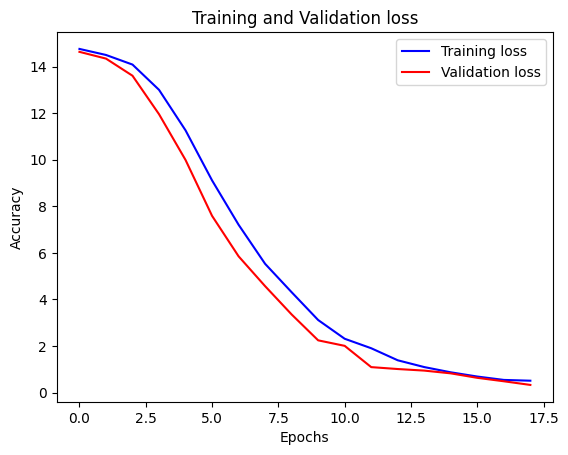

In [ ]:
# plotting the training results and validation results to check for over fittiing of my model
plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Some Results**

1/1 [==============================] - 0s 310ms/step
nc4yg


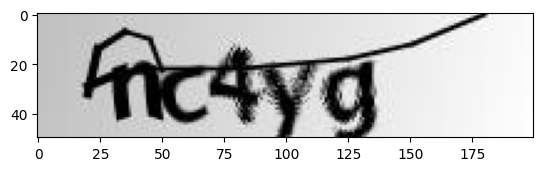

In [ ]:

img_path=f'/content/c/CaptchaDataset/dataset1/images/978.png'
print(predicting(img_path))
plt.imshow(cv2.imread(img_path))

1/1 [==============================] - 0s 21ms/step
edb7y


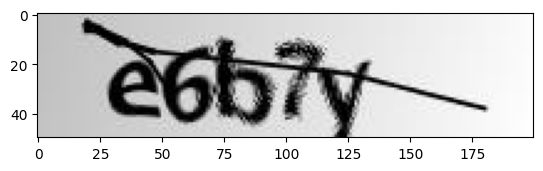

In [ ]:

img_path=f'/content/c/CaptchaDataset/dataset1/images/100.png'
print(predicting(img_path))
plt.imshow(cv2.imread(img_path))

1/1 [==============================] - 0s 19ms/step
6bxwg


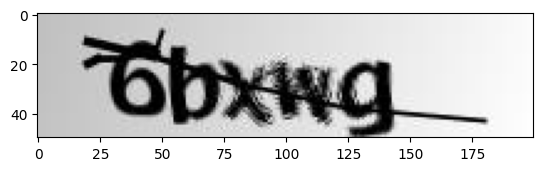

In [ ]:

img_path=f'/content/c/CaptchaDataset/dataset1/images/300.png'
print(predicting(img_path))
plt.imshow(cv2.imread(img_path))

1/1 [==============================] - 0s 19ms/step
36w25


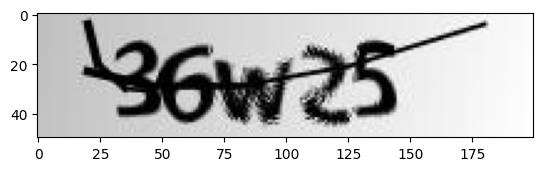

In [ ]:

img_path=f'/content/c/CaptchaDataset/dataset1/images/40.png'
print(predicting(img_path))
plt.imshow(cv2.imread(img_path))

1/1 [==============================] - 0s 19ms/step
gp22x


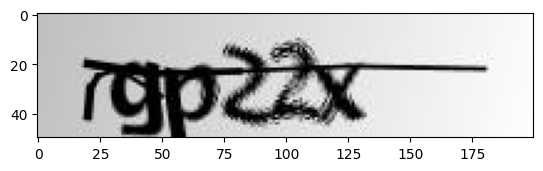

In [ ]:

img_path=f'/content/c/CaptchaDataset/dataset1/images/500.png'
print(predicting(img_path))
plt.imshow(cv2.imread(img_path))

Character wise accuracy :

In [ ]:
df=pd.read_csv('/content/c/CaptchaDataset/dataset1/mapping.csv')
accuracy=0
total=0
for img in os.listdir('/content/c/CaptchaDataset/dataset1/images'):
  if os.path.splitext(img)[1].lower() in image_extensions:
    total=total+5
    st=predicting(os.path.join('/content/c/CaptchaDataset/dataset1/images',img))
    for i in range(5):
      if st[i]==df['captcha'][df.index[df['file_name']==img].to_list()[0]][i]:
        accuracy=accuracy+1

1/1 [==============================] - 0s 38ms/step


In [ ]:
accuracy_percentage=(accuracy/total)*100
accuracy_percentage

92.03738317757009

**Accuracy of predicting the whole captcha right :**

In [ ]:
df=pd.read_csv('/content/c/CaptchaDataset/dataset1/mapping.csv')
accuracy=0
total=0
for img in os.listdir('/content/c/CaptchaDataset/dataset1/images'):
  if os.path.splitext(img)[1].lower() in image_extensions:
    total=total+1
    st=predicting(os.path.join('/content/c/CaptchaDataset/dataset1/images',img))
    if st==df['captcha'][df.index[df['file_name']==img].to_list()[0]]:
      accuracy=accuracy+1

1/1 [==============================] - 0s 34ms/step


In [ ]:
accuracy_percentage=(accuracy/total)*100
accuracy_percentage

66.54205607476635

In [ ]:
pip install gradio


In [ ]:
def predicting(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (200, 200))  # Resize to match input size
    img = img / 255.0  # Scale the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions=model.predict(img)
    captcha=''
    for p in predictions:
      for pp in p:
        index = np.argmax(pp)
        captcha=captcha+elements[index]
    image = cv2.imread(image_path)
    return image,captcha


**interface for giving input image**

In [ ]:
import gradio as gr

demo = gr.Interface(fn=predicting, inputs="textbox", outputs=[gr.Image(type='numpy',label="Captcha Image"), gr.Textbox(label="Predicted Captcha")])
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://971aa0e4f4069c5f5a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
